# Rainfall Prediction

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import the dataset
data = pd.read_csv(r"austin_weather.csv")
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [4]:
#Remove the columns that are not needed
data = data.drop(["Events", "Date", "SeaLevelPressureLowInches"], axis = 1)

In [5]:
data.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,T


In [6]:
data = data.replace("T", 0.0)

In [7]:
data = data.replace("-", 0.0)

In [8]:
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0


In [9]:
data.to_csv("austin_weather_final.csv")

In [10]:
#Import the libraries needed for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [11]:
#Import the clean data
df = pd.read_csv("austin_weather_final.csv")
df.head()

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00


In [12]:
X = df.drop(["PrecipitationSumInches"], axis = 1)

In [13]:
Y = df["PrecipitationSumInches"]

In [14]:
#Reshaping it into 2D vector
Y = Y.values.reshape(-1,1)

In [15]:
Y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [16]:
day_index = 798
days = [i for i in range(Y.size)]

In [17]:
#Initialise the linear regression classifier
clf = LinearRegression()

#Train the classifier
clf.fit(X,Y)

LinearRegression()

The precipitation trend graph:


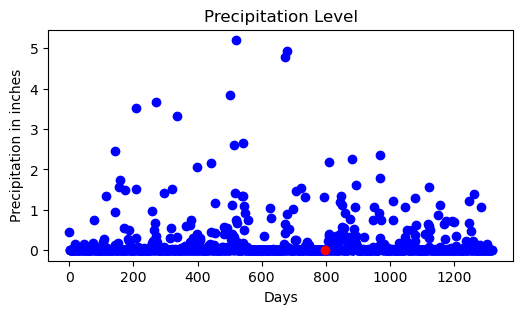

In [40]:
#Plot the graph
print("The precipitation trend graph:")
plt.figure(figsize=(6, 3))
plt.scatter(days, Y, color = "b")
plt.scatter(days[day_index], Y[day_index], color = "r")
plt.title("Precipitation Level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()

x_vis = x.filter(["TempAvgF", "DewPointAvgF", "HumidityAvgPercent", "SeaLevelPressureAvgInches", "VisibilityAvgMiles", "WindAvgMPH"])

In [60]:
print(x_vis.shape)
print(len(days))
print(x_vis.columns)

(1319, 6)
1319
Index(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
       'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'],
      dtype='object')


In [68]:
print(x_vis.dtypes)
print(x_vis.isnull().sum())

TempAvgF                       int64
DewPointAvgF                 float64
HumidityAvgPercent           float64
SeaLevelPressureAvgInches    float64
VisibilityAvgMiles           float64
WindAvgMPH                   float64
dtype: object
TempAvgF                     0
DewPointAvgF                 0
HumidityAvgPercent           0
SeaLevelPressureAvgInches    0
VisibilityAvgMiles           0
WindAvgMPH                   0
dtype: int64


In [70]:
print(x_vis['VisibilityAvgMiles'].describe())
print(x_vis['WindAvgMPH'].describe())


count    1319.000000
mean        9.078848
std         1.693019
min         0.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: VisibilityAvgMiles, dtype: float64
count    1319.000000
mean        5.000758
std         2.093961
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        12.000000
Name: WindAvgMPH, dtype: float64


The precipitation vs attribute trend graph:


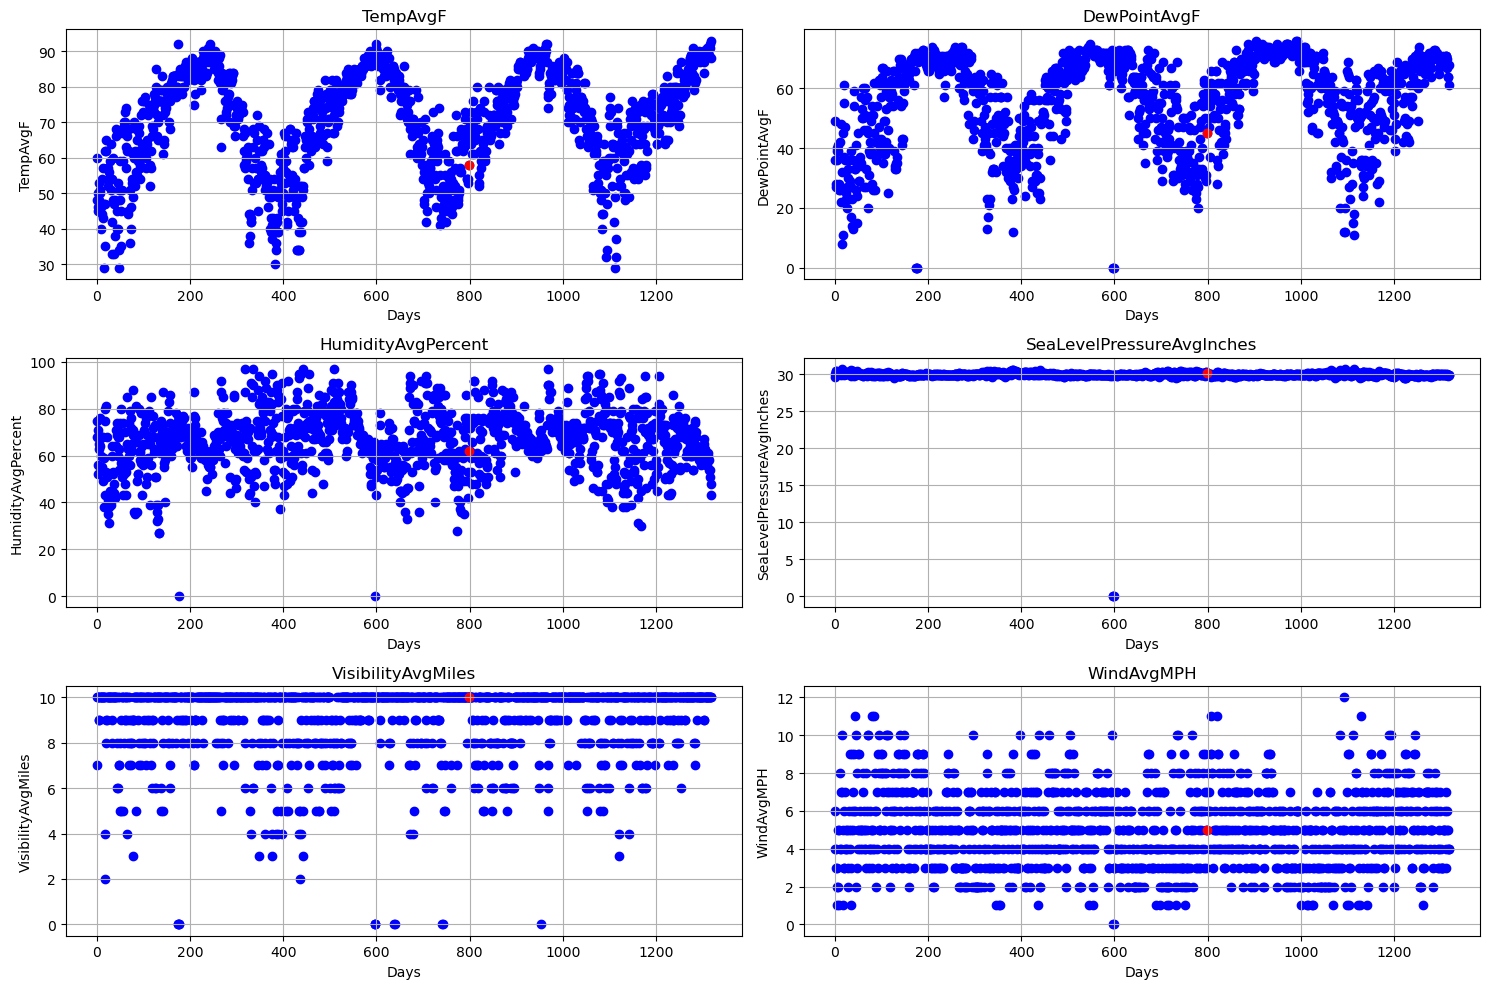

In [80]:
print("The precipitation vs attribute trend graph:")
fig, axs = plt.subplots(3, 2, figsize=(15, 10)) 

for i, col in enumerate(x_vis.columns):
    ax = axs[i // 2, i % 2]
    ax.scatter(days, x_vis[col], color='b')
    ax.scatter(days[day_index], x_vis[col].iloc[day_index], color='r')
    ax.set_title(col)
    ax.set_xlabel("Days")
    ax.set_ylabel(col)
    ax.grid(True)

plt.tight_layout()
plt.show()


**Summary Insights Overview:**

*     Visual patterns show seasonal trends in attributes like temperature and dew point.

*     Humidity and precipitation may exhibit positive correlation.

*     Certain features like pressure and visibility seem less directly associated at first glance — worth testing with further models.